# INIT

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/CL

/content/drive/MyDrive/Colab Notebooks/CL


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/CL


# Save stacked scores and labels

In [ ]:
labels = np.load("./cifar10_labels.npy")
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
fs = np.load("./cifar10_train_precomputedfs_task=0_epoch=200_studysetup.npy")

In [ ]:
fs_with_labels = np.vstack((fs, labels))
fs_with_labels[1]

array([6., 9., 9., ..., 9., 1., 1.])

In [ ]:
# np.save("./cifa10_train_precomputedfs_task=0_epoch=200_studysetup_with_labels.npy", fs_with_labels)

In [ ]:
labels = np.load("./cifar100_labels.npy")
print(np.unique(labels))
fs = np.load("./cifar100_train_precomputed_fscores_task=0_epoch=200_studysetup.npy")
fs_with_labels = np.vstack((fs, labels))
print(fs_with_labels[1])
np.save("./cifar100_train_precomputed_fscores_task=0_epoch=200_studysetup_with_labels.npy", fs_with_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[19. 29.  0. ...  3.  7. 73.]


In [ ]:
labels = np.load("./cifar100_labels.npy")
print(np.unique(labels))
cs = np.load("./cifar100_cscores.npy")
cs_with_labels = np.vstack((fs, labels))
print(cs_with_labels[1])
np.save("./cifar100_train_precomputed_cscores_with_labels.npy", cs_with_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[19. 29.  0. ...  3.  7. 73.]


In [ ]:
labels = np.load("./cifar10_labels.npy")
print(np.unique(labels))
fs = np.load("./cifar10_train_precomputedfs_task=0_epoch=200_miscsetup.npy")
fs_with_labels = np.vstack((fs, labels))
print(fs_with_labels[1])
np.save("./cifar10_train_precomputed_fscores_task=0_epoch=200_miscsetup_with_labels.npy", fs_with_labels)

[0 1 2 3 4 5 6 7 8 9]
[6. 9. 9. ... 9. 1. 1.]


In [ ]:
 labels = np.load("./cifar10_labels.npy")
print(np.unique(labels))
fs = np.load("./cifar10_train_precomputed_fscores_task=0_epoch=200_studysetup_heavyaugment.npy")
fs_with_labels = np.vstack((fs, labels))
print(fs_with_labels[1])
np.save("./cifar10_train_precomputed_fscores_task=0_epoch=200_studysetup_heavyaugment_with_labels.npy", fs_with_labels)

[0 1 2 3 4 5 6 7 8 9]
[6. 9. 9. ... 9. 1. 1.]


# C-score vs. f-score

## c-score and f-score histograms

In [ ]:
fs = np.load("./fs_task=0_globaliter=10000.npy")

In [ ]:
fs.shape

(50000,)

In [ ]:
np.isnan(fs).any()

False

In [ ]:
sum(np.isinf(fs))

872

In [ ]:
fs[fs == np.inf] = -1
sum(np.isinf(fs))

0

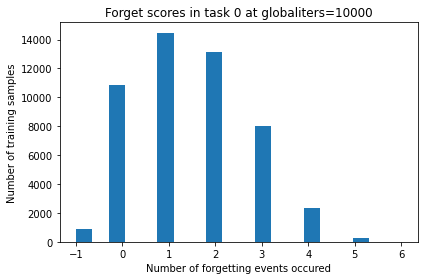

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(fs, bins=20)
plt.title("Forget scores in task 0 at globaliters=10000")
plt.xlabel("Number of forgetting events occured")
plt.ylabel("Number of training samples")
plt.show()

In [ ]:
cs = np.load("/content/drive/MyDrive/Colab\ Notebooks/CL/cscores.npy")

In [ ]:
cs.shape

(50000,)

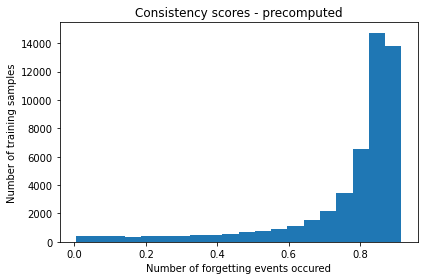

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(cs, bins=20)
plt.title("Consistency scores - precomputed")
plt.xlabel("Number of forgetting events occured")
plt.ylabel("Number of training samples")
plt.show()

## get least/most forgettables, unforgettables, neverlearnt

In [ ]:
fs = np.load("./fs_task=0_globaliter=10000.npy")
fs.shape

(50000,)

In [ ]:
sum(np.isinf(fs))

872

In [ ]:
fs[fs == np.inf] = -1
sum(np.isinf(fs))

0

In [ ]:
forgettables = np.where(fs > 0)[0]
forgettables.shape

(38284,)

In [ ]:
unforgettables = np.where(fs == 0)[0]
unforgettables.shape

(10844,)

In [ ]:
neverlearnt = np.where(fs == -1)[0]
neverlearnt.shape

(872,)

In [ ]:
half_size = len(forgettables) // 2

In [ ]:
least_forgettables = forgettables[np.argsort(fs[forgettables])[:half_size]]
most_forgettables = forgettables[np.argsort(fs[forgettables])[-half_size:]]
least_forgettables[:10], most_forgettables[-10:]

(array([    0, 25738, 25734, 25725, 25719, 25718, 25712, 25711, 25739,
        25709]),
 array([20194, 23327, 26460, 25187, 22170, 32918, 14250, 22266, 33242,
         4035]))

### check label distribution

In [ ]:
labels = np.load("/content/drive/MyDrive/Colab Notebooks/CL/labels.npy")
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

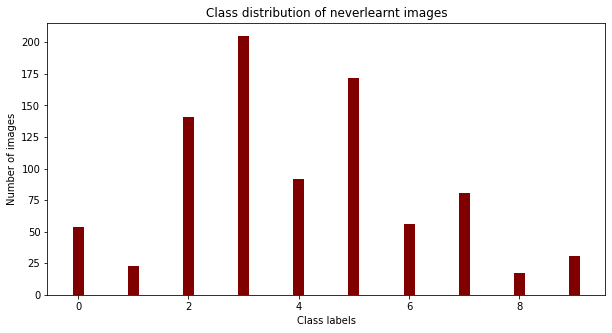

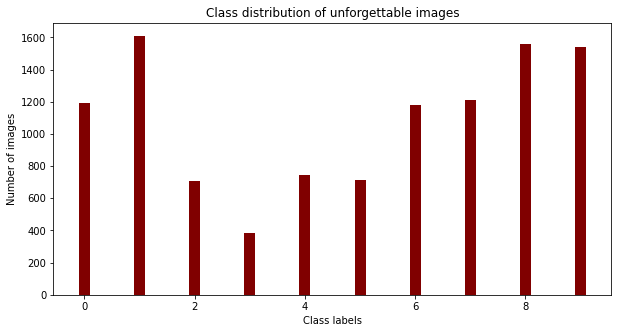

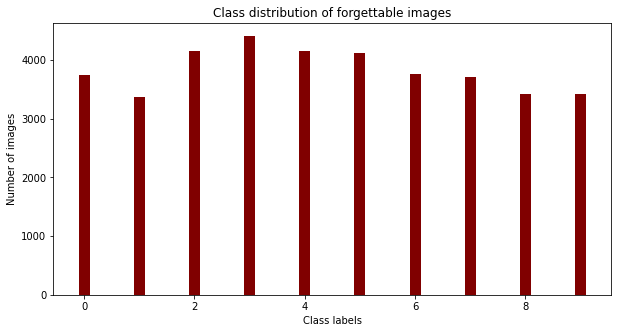

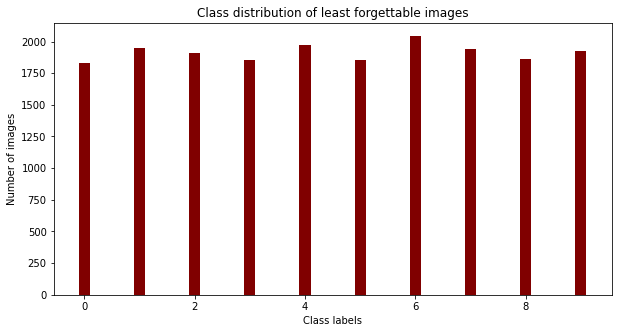

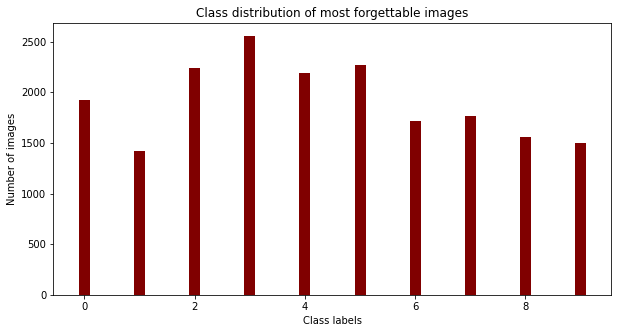

In [ ]:
def plot_category_labels_dist(category_indices, category_name):  
    category_labels = labels[category_indices]
    fig = plt.figure(figsize = (10, 5))
    classes = np.unique(labels)
    counts = [np.count_nonzero(category_labels == c) for c in classes]
    plt.bar(classes, counts, color ='maroon', width=0.2)
    plt.xlabel("Class labels")
    plt.ylabel("Number of images")
    plt.title(f"Class distribution of {category_name} images")
    plt.show()
    plt.close()
    return

plot_category_labels_dist(neverlearnt, "neverlearnt")

plot_category_labels_dist(unforgettables, "unforgettable")

plot_category_labels_dist(forgettables, "forgettable")

plot_category_labels_dist(least_forgettables, "least forgettable")

plot_category_labels_dist(most_forgettables, "most forgettable")

In [ ]:
sorted_indices = np.argsort(fs)
fs[sorted_indices[:10]], fs[sorted_indices[-10:]]

(array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([5., 6., 6., 6., 6., 6., 6., 6., 6., 6.]))

### per class selection

## get high/low cscore examples 

In [ ]:
cs = np.load("/content/drive/MyDrive/Colab Notebooks/CL/cifar100_cscores.npy")
cs.shape

(50000,)

In [ ]:
highcs = np.argwhere(cs > 0.6).flatten()
highcs.shape

(26470,)

In [ ]:
lowcs = np.argwhere(cs <= 0.6).flatten()
lowcs.shape

(23530,)

### check label distribution

In [ ]:
labels = np.load("/content/drive/MyDrive/Colab Notebooks/CL/cifar100_labels.npy")
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

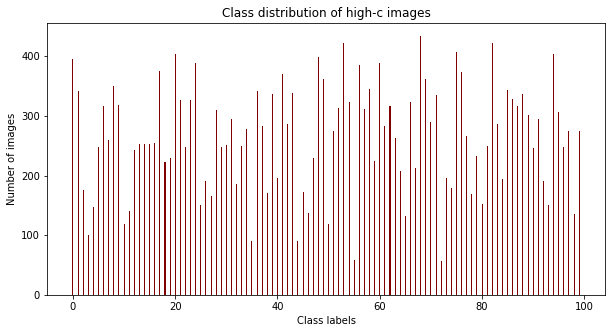

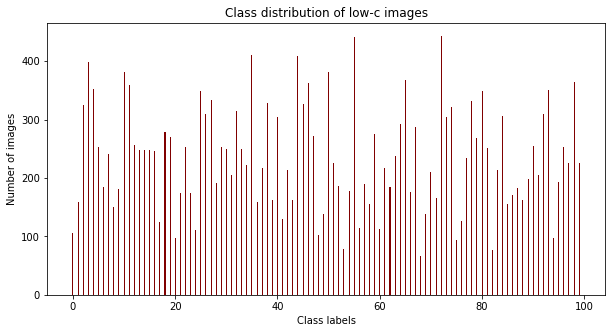

In [ ]:
def plot_category_labels_dist(category_indices, category_name):  
    category_labels = labels[category_indices]
    fig = plt.figure(figsize = (10, 5))
    classes = np.unique(labels)
    counts = [np.count_nonzero(category_labels == c) for c in classes]
    plt.bar(classes, counts, color ='maroon', width=0.2)
    plt.xlabel("Class labels")
    plt.ylabel("Number of images")
    plt.title(f"Class distribution of {category_name} images")
    plt.show()
    plt.close()
    return

plot_category_labels_dist(highcs, "high-c")

plot_category_labels_dist(lowcs, "low-c")

### per class selection

In [ ]:
np.argwhere(labels == c).flatten()

array([    4,     5,    32, ..., 49993, 49998, 49999])

In [ ]:
np.where(labels == c)[0]

array([    4,     5,    32, ..., 49993, 49998, 49999])

In [ ]:
c = 1 
class_indices = np.argwhere(labels == c).flatten()
class_indices.shape

(5000,)

In [ ]:
cs[class_indices].shape

(5000,)

In [ ]:
class_scores = cs[class_indices]

highc_per_class = np.argwhere(class_scores > 0.8).flatten()
highc_per_class.shape

(4239,)

###stack labels and scores

In [ ]:
cs_with_labels = np.vstack((cs, labels))
cs_with_labels[1]

array([6., 9., 9., ..., 9., 1., 1.])

In [ ]:
# np.save("./cifa10_precomputed_cscores_with_labels.npy", cs_with_labels)

In [ ]:
class_indices = np.argwhere(cs_with_labels[1] == c).flatten()
class_indices.shape

(5000,)

In [ ]:
class_scores = cs_with_labels[0][class_indices]
class_scores

array([0.89352657, 0.87648873, 0.89847138, ..., 0.89420563, 0.89265983,
       0.23925151])

In [ ]:
caws_per_class = np.argwhere(class_scores > 0.8).flatten()
caws_per_class

array([   0,    1,    2, ..., 4996, 4997, 4998])

In [ ]:
class_indices[caws_per_class]

array([    4,     5,    32, ..., 49989, 49993, 49998])

In [ ]:
4 in class_indices[caws_per_class]

True

In [ ]:
sample_size = len(class_scores) // 2

In [ ]:
sorted_class_score_indices = np.argsort(class_scores)
print(sorted_class_score_indices.shape)

highcs_indices_in_ds = class_indices[sorted_class_score_indices[-sample_size:]]
print(highcs_indices_in_ds.shape)

(5000,)
(2500,)


In [ ]:
cs_with_labels[:, highcs_indices_in_ds]

array([[0.87734381, 0.87735338, 0.87735975, ..., 0.9116365 , 0.91479136,
        0.91499472],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

## plot top ranked images based on scores

In [ ]:
labels = np.load("/content/drive/MyDrive/Colab Notebooks/CL/labels.npy")

In [ ]:
labels

array([6, 9, 9, ..., 9, 1, 1])

In [ ]:
from torchvision import datasets, transforms


train_transforms = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', 
                                train=True,
                                download=True, 
                                transform=train_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
pt_labels = [data[1] for data in train_dataset]

In [ ]:
print(np.array(pt_labels))

[6 9 9 ... 9 1 1]


In [ ]:
np.all(np.array(labels) == np.array(pt_labels))

True

In [ ]:
train_example_indices = np.arange(0, len(train_dataset))
train_example_indices

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [ ]:
fs_sorted_indices = np.argsort(fs)
fs_sorted_indices

array([26504,  9343, 48443, ..., 32918, 22266,  4035])

In [ ]:
cs_sorted_indices = np.argsort(cs)
cs_sorted_indices

array([ 8022, 32574, 21645, ..., 25506, 35878,   772])

In [ ]:
for i in range(0, 1000):
    print(i, np.where(cs_sorted_indices == fs_sorted_indices[i])[0][0])

0 2644
1 2587
2 1904
3 773
4 629
5 747
6 16
7 2913
8 2187
9 1108
10 890
11 1468
12 363
13 86
14 6692
15 1145
16 268
17 7738
18 475
19 1199
20 1716
21 6913
22 3125
23 4448
24 986
25 919
26 170
27 787
28 10357
29 1001
30 210
31 2125
32 3130
33 5349
34 200
35 229
36 13393
37 5495
38 3833
39 177
40 1880
41 6031
42 30
43 1806
44 637
45 3252
46 117
47 113
48 315
49 61
50 4249
51 461
52 2371
53 218
54 87
55 93
56 723
57 1557
58 939
59 411
60 1530
61 586
62 48
63 11
64 1591
65 1064
66 547
67 2066
68 4318
69 3211
70 263
71 1479
72 1024
73 223
74 1233
75 864
76 737
77 12474
78 370
79 1937
80 663
81 1068
82 12454
83 137
84 401
85 1725
86 2102
87 2208
88 6301
89 1182
90 107
91 3
92 165
93 1711
94 1478
95 855
96 623
97 9267
98 1765
99 2227


In [ ]:
common_indices = np.intersect1d(cs_sorted_indices[:5000], fs_sorted_indices[:5000])
common_indices.shape

(812,)

In [ ]:
class0_indices = np.where(labels == 0)[0]
class0_indices.shape

(5000,)

In [ ]:
class0_cs = cs[class0_indices]
class0_cs

array([0.73436785, 0.83556057, 0.72848854, ..., 0.83875626, 0.87855665,
       0.75725963])

In [ ]:
class0_cs_sorted_indices = np.argsort(class0_cs)
class0_cs_sorted_indices

array([3850, 3628, 4469, ..., 3559, 1783, 4258])

In [ ]:
class0_fs = fs[class0_indices]
class0_fs_sorted_indices = np.argsort(class0_fs)


In [ ]:
class0_top1000_common_indices = np.intersect1d(class0_cs_sorted_indices[:1000], class0_fs_sorted_indices[:1000])
class0_top1000_common_indices

array([  12,  335,  388,  448,  470,  519,  648,  748,  754,  860, 1042,
       1270, 1362, 1382, 1434, 1474, 1591, 1594, 1618, 1651, 1660, 1710,
       1801, 1828, 1842, 1861, 1987, 2099, 2110, 2253, 2278, 2331, 2363,
       2579, 2641, 2651, 2829, 2892, 2916, 2942, 2962, 2967, 3249, 3256,
       3265, 3332, 3333, 3359, 3468, 3582, 3588, 3619, 3628, 3649, 3752,
       3850, 3863, 3891, 3935, 3944, 3962, 3995, 4020, 4081, 4444, 4448,
       4469, 4486, 4614, 4697, 4748, 4806, 4834, 4842, 4903, 4964, 4967,
       4993])

In [ ]:
class0_top1000_common_indices.shape

(78,)

In [ ]:
import torch

In [ ]:
train_images = torch.stack([data[0] for data in train_dataset])

In [ ]:
[data[0] for data in train_dataset][0].shape

torch.Size([3, 32, 32])

In [ ]:
common_images = torch.index_select(train_images, 0, torch.tensor(class0_top1000_common_indices))

In [ ]:
common_images.shape

torch.Size([78, 3, 32, 32])

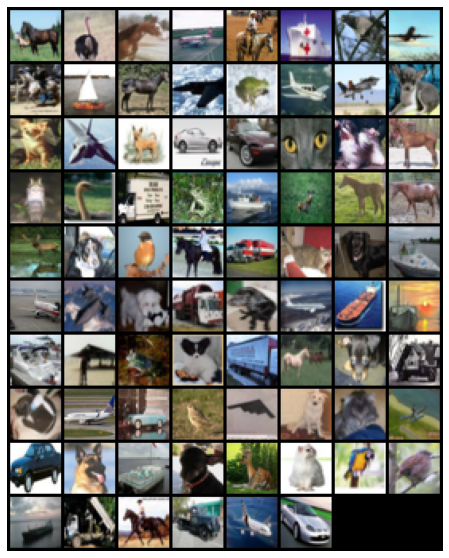

In [ ]:
import torchvision

def plot_image_grid(images, figsize=(10,10)):
    image_grid = torchvision.utils.make_grid(images)
    fig = plt.figure(figsize=figsize)
    ax = plt.imshow(np.transpose(image_grid, (1, 2, 0)))
    plt.axis('off')
    plt.show()

plot_image_grid(common_images)

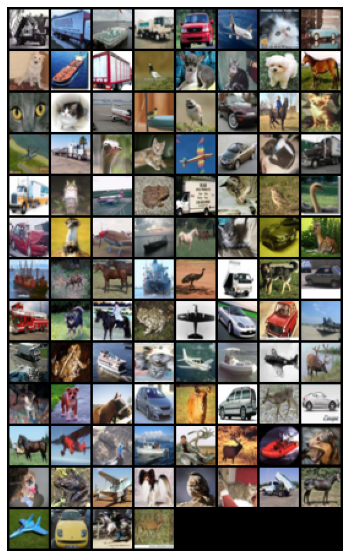

In [ ]:
class0_cs_top100_images = torch.index_select(train_images, 0, torch.tensor(class0_cs_sorted_indices[:100]))
plot_image_grid(class0_cs_top100_images)

# F-score in base vs. cl

In [ ]:
fs

array([1., 2., 3., ..., 3., 0., 3.])

In [ ]:
fs_task4 = np.load("./fs_task=4_globaliter=10000.npy")
fs_task4

array([0., 0., 1., ..., 1., 0., 2.])

In [ ]:
len(np.where(fs == fs_task4)[0])

14449

In [ ]:
len(np.where(fs[np.where(fs == fs_task4)[0]] == 0)[0])

7568

In [ ]:
len(np.where(fs[np.where(fs == fs_task4)[0]] == 1)[0])

3467

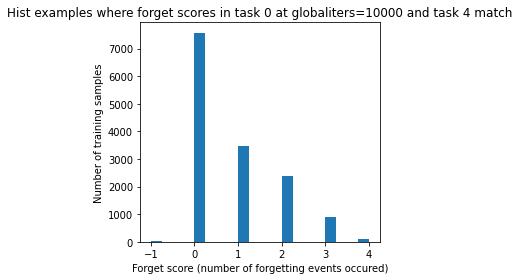

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(fs[np.where(fs == fs_task4)[0]], bins=20)
plt.title("Hist examples where forget scores in task 0 at globaliters=10000 and task 4 match")
plt.xlabel("Forget score (number of forgetting events occured)")
plt.ylabel("Number of training samples")
plt.show()

# Cifar100

In [ ]:
cs = np.load("./cifar100_cscores.npy")
cs

array([0.32016864, 0.95746222, 0.81956254, ..., 0.46526832, 0.00625901,
       0.98026857])

In [ ]:
cifar100_labels = np.load("./cifar100_labels.npy")
cifar100_labels[:10]

array([19, 29,  0, 11,  1, 86, 90, 28, 23, 31])

In [ ]:
from torchvision import datasets, transforms


train_transforms = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR100(root='./data', 
                                train=True,
                                download=True, 
                                transform=train_transforms)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
pt_labels = [data[1] for data in train_dataset]

In [ ]:
np.all(np.array(cifar100_labels) == np.array(pt_labels))

True

# MiniImagenet

In [ ]:
import pickle
TEST_SPLIT = 1 / 6

In [ ]:
def shuffle_data(x, y):
    perm_inds = np.arange(0, x.shape[0])
    np.random.shuffle(perm_inds)
    rdm_x = x[perm_inds]
    rdm_y = y[perm_inds]
    return rdm_x, rdm_y

In [ ]:
!pwd
%cd ./CL

/content/drive/MyDrive/Colab Notebooks/CL
[Errno 2] No such file or directory: './CL'
/content/drive/MyDrive/Colab Notebooks/CL


In [ ]:
train_in = open("./datasets/miniimagenet/mini-imagenet-cache-train.pkl", "rb")
train = pickle.load(train_in)
train_x = train["image_data"].reshape([64, 600, 84, 84, 3])
val_in = open("./datasets/miniimagenet/mini-imagenet-cache-val.pkl", "rb")
val = pickle.load(val_in)
val_x = val['image_data'].reshape([16, 600, 84, 84, 3])
test_in = open("./datasets/miniimagenet/mini-imagenet-cache-test.pkl", "rb")
test = pickle.load(test_in)
test_x = test['image_data'].reshape([20, 600, 84, 84, 3])
all_data = np.vstack((train_x, val_x, test_x))
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(len(all_data)):
    cur_x = all_data[i]
    cur_y = np.ones((600,)) * i
    rdm_x, rdm_y = shuffle_data(cur_x, cur_y)
    x_test = rdm_x[: int(600 * TEST_SPLIT)]
    y_test = rdm_y[: int(600 * TEST_SPLIT)]
    x_train = rdm_x[int(600 * TEST_SPLIT):]
    y_train = rdm_y[int(600 * TEST_SPLIT):]
    train_data.append(x_train)
    train_label.append(y_train)
    test_data.append(x_test)
    test_label.append(y_test)
train_data = np.concatenate(train_data)
train_label = np.concatenate(train_label)
test_data = np.concatenate(test_data)
test_label = np.concatenate(test_label)

In [ ]:
int(600 * TEST_SPLIT)

100

In [ ]:
train_data.shape

(50000, 84, 84, 3)

torch.Size([10, 3, 84, 84])
torch.Size([3, 174, 690])


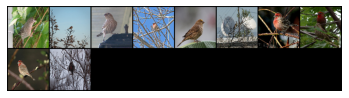

In [ ]:
import torch
train_images = train_data[:10]
image_batch = torch.tensor(np.transpose(train_images, (0, 3, 1, 2)))
print(image_batch.shape)
image_grid = torchvision.utils.make_grid(image_batch)
print(image_grid.shape)
ax = plt.imshow(np.transpose(image_grid, (1, 2, 0)))
plt.axis('off')
plt.show()

In [ ]:
train_data[0]

array([[[215, 216, 218],
        [210, 211, 209],
        [202, 203, 198],
        ...,
        [ 57,  89,  27],
        [ 62,  94,  26],
        [138, 134,  89]],

       [[216, 217, 219],
        [210, 211, 209],
        [203, 204, 199],
        ...,
        [ 55,  93,  30],
        [ 69,  83,  30],
        [164, 130,  92]],

       [[214, 215, 217],
        [212, 213, 210],
        [203, 204, 199],
        ...,
        [ 60,  93,  31],
        [150, 140,  94],
        [176, 115,  70]],

       ...,

       [[220, 219, 225],
        [219, 216, 223],
        [216, 214, 215],
        ...,
        [101, 153,  19],
        [ 96, 149,  18],
        [ 96, 144,  31]],

       [[218, 217, 219],
        [221, 219, 227],
        [218, 213, 214],
        ...,
        [101, 152,  21],
        [103, 151,  17],
        [104, 142,  52]],

       [[221, 220, 221],
        [221, 220, 228],
        [219, 213, 214],
        ...,
        [106, 159,  26],
        [106, 153,  18],
        [ 74, 115,  46]]

In [ ]:
train_label.shape

(50000,)

In [ ]:
train = torch.utils.data.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_label))

In [ ]:
np.unique(train_label)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [ ]:
train_loader = torch.utils.data.DataLoader(train)

In [ ]:
len(train)

50000

In [ ]:
from torchvision import datasets, transforms


train_transforms = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', 
                                train=True,
                                download=True, 
                                transform=train_transforms)

Files already downloaded and verified


In [ ]:
len(train_dataset)

50000

In [ ]:
train_dataset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
images = np.array([train_dataset[i][0] for i in range(len(train_dataset))])


<ipython-input-41-eb381fbb5dec>:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images = np.array([train_dataset[i][0] for i in range(len(train_dataset))])
<ipython-input-41-eb381fbb5dec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array([train_dataset[i][0] for i in range(len(train_dataset))])


TypeError: ignored

In [ ]:
images[0].max()

tensor(1.)

In [ ]:
len(train)

50000

In [ ]:
train_loader = torch.utils.data.DataLoader(train,
                            batch_size=128,
                            shuffle=True)

In [ ]:
train_loader

In [ ]:
train[5][1]

tensor(0., dtype=torch.float64)

## torchmeta - did not work

In [ ]:
!pip install torchmeta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd pytorch-meta
!python setup.py install

/content/drive/MyDrive/Colab Notebooks/CL/pytorch-meta
running install
running bdist_egg
running egg_info
writing torchmeta.egg-info/PKG-INFO
writing dependency_links to torchmeta.egg-info/dependency_links.txt
writing requirements to torchmeta.egg-info/requires.txt
writing top-level names to torchmeta.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'torchmeta.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying torchmeta/datasets/utils.py -> build/lib/torchmeta/datasets
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/torchmeta
copying build/lib/torchmeta/__init__.py -> build/bdist.linux-x86_64/egg/torchmeta
copying build/lib/torchmeta/version.py -> build/bdist.linux-x86_64/egg/torchmeta
creating build/bdist.linux-x86_64/egg/torchmeta/datasets
copying build/lib/torchmeta/datasets/__init__.py -> build/bdist.linux-x86_64/egg/t

In [ ]:
import torchmeta

In [ ]:
%cd ../

/content/drive/MyDrive/Colab Notebooks/CL


In [ ]:
miniimagenet_dataset = torchmeta.datasets.MiniImagenet("./data", num_classes_per_task=20,
    meta_train=False, meta_val=False, meta_test=False, meta_split="train",
    transform=None, target_transform=None, dataset_transform=None,
    class_augmentations=None, download=True)

In [ ]:
dataloader = torchmeta.utils.data.BatchMetaDataLoader(miniimagenet_dataset, batch_size=16, num_workers=2)

In [ ]:
dataloader

In [ ]:
batch = next(iter(dataloader))

TypeError: ignored

# Check memory content indices and scores

In [ ]:
memory_indices = np.loadtxt("/content/memory_idxinds_task=1_globaliter=3209.txt")
memory_indices.shape

(402,)

In [ ]:
len(np.unique(memory_indices))

402

In [ ]:
memory_indices = np.loadtxt("/content/memory_idxinds_task=3_globaliter=12800.txt")
memory_indices.shape
len(np.unique(memory_indices))

492

In [ ]:
global_fs = np.load("./global_fs_task=4_globaliter=15700.npy")

In [ ]:
my_file = open("/content/memory_idxinds_task=4_globaliter=15700.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
data_to_list = data.split("\n")
#print(data_to_list)
indices = np.array([int(item) for item in data_to_list if len(item) > 0])
my_file.close()
print(indices)

[ 9354 44415 22918  4027 21916 35798  2158 28458  1474  5143 13217 31819
  4850 42662 26387 36938  1467  2929  8640 37889 17293 41498 33809  2082
 41020 30347 19125 31930  1421  3583 15954 11012 40822 48813 39842 24619
 47277 15327  5100  5574 29130 42986 43442 34268 11241  1662  2169 27252
 21454 23535 41190 31132 42218 34877  6727 29887 45659 17768 13445 17657
  8119 18176  4572 20065 10442 16755 37622 14236  5911 42998 23799 14214
 12113 30663 40548 21386 35430 30543 49656  9103 26607 11224 40780 16271
 22288 41890 41342  7326 13104 12367  3668 12962 32738  9674 23840 10066
 22500 29806 27742 22578 13414 41608 13118 45451 37108 15705  3181 47990
 26305 19348 14968 36562 21946 31350  2165 46486 41100 31307 45636 43137
  9910  8352 49100 34016 44941 26741 16684 10797 21919 40139 45627 31988
  5956 33831 37273 24749  3371 49900  1801 16605 34715 39658 42090 33892
 29345 17779 21585 19848 27545  8953 27906 28031 41371 25048 32002 36752
 25846 30274   871 48007 19010 22146 43324 31614 12

In [ ]:
len(indices)


1000

In [ ]:
len(np.unique(indices))

984

In [ ]:
u, c = np.unique(indices, return_counts=True)
dups = u[c > 1]
dups

array([  419,  1228,  1801,  7122,  7357, 10554, 13686, 19848, 23288,
       31878, 34165, 40153, 41682, 46417, 48007])

In [ ]:
global_fs[indices]

In [ ]:
labels = np.load("./cifar10_labels.npy")

In [ ]:
memory_labels = labels[indices]
memory_labels

# Calculate rank correlations

In [ ]:
import scipy
from scipy import stats

## fscore - cscore

In [ ]:
cifar10_cscore = np.load("./scores_for_rank_correlation/cifar10_cscores.npy")

cifar10_scrsetup_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_scrsetup_fscore_seed1.npy")
cifar10_scrsetup_fscore_seed2 = np.load("./scores_for_rank_correlation/cifar10_scrsetup_fscore_seed2.npy")

cifar10_studysetup_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_studysetup_fscore_seed1.npy")
cifar10_studysetup_fscore_seed2 = np.load("./scores_for_rank_correlation/cifar10_studysetup_fscore_seed2.npy")

cifar10_studysetup_woaugment_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_studysetup_woaugment_fscore_seed1.npy")
cifar10_studysetup_woaugment_fscore_seed2 = np.load("./scores_for_rank_correlation/cifar10_studysetup_woaugment_fscore_seed2.npy")

cifar10_miscsetup_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_fscore_seed1.npy")
cifar10_miscsetup_fscore_seed2 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_fscore_seed2.npy")
cifar10_miscsetup_fscore_seed3 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_fscore_seed3.npy")

cifar10_miscsetup_lrfix_fscore_seed0 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_lr=1e-1_fscore_seed0.npy")
cifar10_miscsetup_lrfix_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_lr=1e-1_fscore_seed1.npy")

# this setup = studysetup w heavy augmentation
cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_lr=1e-1_wnesterov_wnormalization_fscore_seed1.npy")
cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed2 = np.load("./scores_for_rank_correlation/cifar10_miscsetup_lr=1e-1_wnesterov_wnormalization_fscore_seed2.npy")


In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_studysetup_fscore_seed2)

SignificanceResult(statistic=0.7901295449640543, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_scrsetup_fscore_seed2)

SignificanceResult(statistic=0.461146060086596, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_miscsetup_fscore_seed2)

SignificanceResult(statistic=0.931320848834038, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_miscsetup_fscore_seed1)

SignificanceResult(statistic=0.7200032076783085, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_miscsetup_fscore_seed2)

SignificanceResult(statistic=0.7196036804361484, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed2, cifar10_miscsetup_fscore_seed1)

SignificanceResult(statistic=0.7183402151155838, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed2, cifar10_miscsetup_fscore_seed2)

SignificanceResult(statistic=0.7191982943569147, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_scrsetup_fscore_seed1)

SignificanceResult(statistic=0.5234139717256244, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_cscore)

SignificanceResult(statistic=-0.7857821975488821, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_cscore)

SignificanceResult(statistic=-0.7806751405887777, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_cscore)

SignificanceResult(statistic=-0.5549637112143144, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_miscsetup_fscore_seed3)

SignificanceResult(statistic=0.930878243029173, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed2, cifar10_miscsetup_fscore_seed3)

SignificanceResult(statistic=0.9309059861063107, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_lrfix_fscore_seed0, cifar10_miscsetup_lrfix_fscore_seed1)

SignificanceResult(statistic=0.923722952080267, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1, cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed2)

SignificanceResult(statistic=0.9249602001430233, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1, cifar10_studysetup_fscore_seed1)

SignificanceResult(statistic=0.7213702983119703, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1, cifar10_miscsetup_fscore_seed1)

SignificanceResult(statistic=0.9540445619516557, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_woaugment_fscore_seed1, cifar10_studysetup_woaugment_fscore_seed2)

SignificanceResult(statistic=0.4606142782412131, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_studysetup_woaugment_fscore_seed1)

SignificanceResult(statistic=0.5245461581353343, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1, cifar10_studysetup_woaugment_fscore_seed1)

SignificanceResult(statistic=0.4585639174486022, pvalue=0.0)

## plot rankcorrelations on cifar10

In [ ]:
all_scores = [cifar10_cscore, cifar10_studysetup_woaugment_fscore_seed1, cifar10_studysetup_woaugment_fscore_seed2,
              cifar10_studysetup_fscore_seed1, cifar10_studysetup_fscore_seed2, cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed1,
              cifar10_miscsetup_lrfix_wnesterovnorm_fscore_seed2]
all_scores = np.transpose(np.array(all_scores))
print(all_scores.shape)
labels = ["consistency", "forgetting noaugment seed1", "forgetting noaugment seed2", "forgetting seed1", "forgetting seed2", "forgetting heavyaugment seed1", "forgetting heavyaugment seed2"]
print(len(labels))

(50000, 7)
7


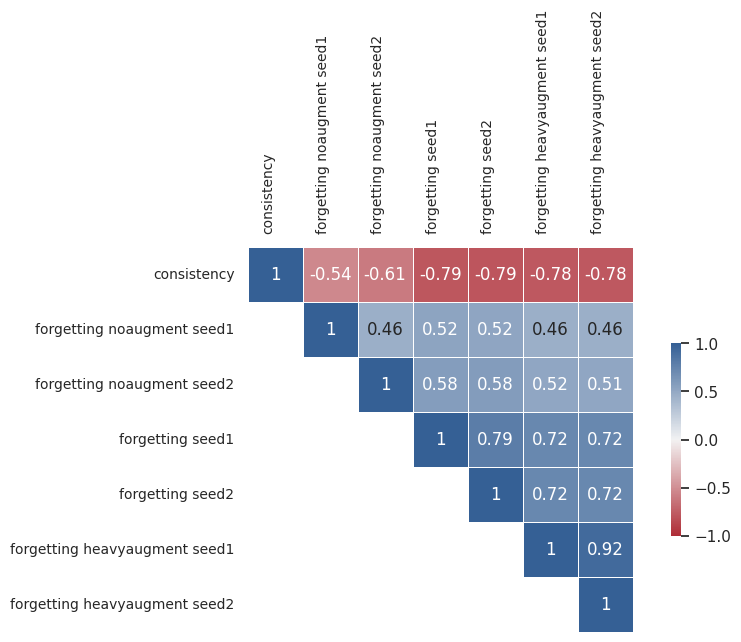

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=all_scores,
                 columns=labels)

# Compute the correlation matrix
corr = d.corr("spearman")

# Generate a mask for the upper triangle
mask = np.transpose(np.triu(np.ones_like(corr, dtype=bool))) 
np.fill_diagonal(mask, False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 30, as_cmap=True)
cmap = sns.color_palette("vlag", as_cmap=True)
cmap = sns.diverging_palette(10, 250, s=75, l=40,
                            n=5, center="light", as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90, ha='right')
plt.show()

## first learn iters - scores

In [ ]:
cifar10_studysetup_firstlearniters_seed1 = np.loadtxt("./scores_for_rank_correlation/cifar10_studysetup_base_seed1_first_learn_iters.txt")
cifar10_studysetup_firstlearniters_seed2 = np.loadtxt("./scores_for_rank_correlation/cifar10_studysetup_base_seed2_first_learn_iters.txt")

cifar10_scrsetup_firstlearniters_seed1 = np.loadtxt("./scores_for_rank_correlation/cifar10_scrsetup_base_seed1_first_learn_iters.txt")
cifar10_scrsetup_firstlearniters_seed2 = np.loadtxt("./scores_for_rank_correlation/cifar10_scrsetup_base_seed2_first_learn_iters.txt")

cifar10_miscsetup_firstlearniters_seed1 = np.loadtxt("./scores_for_rank_correlation/cifar10_miscsetup_base_seed1_first_learn_iters.txt")
cifar10_miscsetup_firstlearniters_seed2 = np.loadtxt("./scores_for_rank_correlation/cifar10_miscsetup_base_seed2_first_learn_iters.txt")

In [ ]:
cifar10_studysetup_firstlearniters_seed1 = np.loadtxt("./scores_for_rank_correlation/cifar10_studysetup_base_seed1_first_learn_iters.txt")
print(cifar10_studysetup_firstlearniters_seed1)
print(len(cifar10_studysetup_firstlearniters_seed1))
print(len(np.unique(cifar10_studysetup_firstlearniters_seed1)))

[ 615. 1270.  301. ...  505.  686.  345.]
50000
5538


In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_firstlearniters_seed1, cifar10_studysetup_firstlearniters_seed2)

SpearmanrResult(correlation=0.46024079744903673, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_firstlearniters_seed1, cifar10_miscsetup_firstlearniters_seed2)

SpearmanrResult(correlation=0.33119840356057983, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_firstlearniters_seed1, cifar10_scrsetup_firstlearniters_seed2)

SpearmanrResult(correlation=0.41685428422162635, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_studysetup_firstlearniters_seed1)

SpearmanrResult(correlation=0.24405028875743062, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_scrsetup_firstlearniters_seed1)

SpearmanrResult(correlation=0.1579784220502382, pvalue=9.050989794794385e-277)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_miscsetup_firstlearniters_seed1)

SpearmanrResult(correlation=0.3663363229442054, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_studysetup_firstlearniters_seed1)

SpearmanrResult(correlation=-0.41787050117189356, pvalue=0.0)

## mean feat dist - scores

In [ ]:
cifar10_meanoutdists = np.loadtxt("./scores_for_rank_correlation/dist_from_mean_feats_task=0_globaliter=78200.npy")
cifar10_normalized_meanoutdists = np.load("./scores_for_rank_correlation/normalized_dist_from_mean_feats_task=0_globaliter=78200.npy")

In [ ]:
print(cifar10_meanoutdists[:10])
print(cifar10_normalized_meanoutdists[:10])

[26.12336349 17.44928169 21.89882851 20.32757759 15.29758835 15.22236633
 15.15207577 38.05170441 18.78170776 19.71921158]
[0.76567346 0.30989826 0.51012427 0.46699572 0.3166158  0.314371
 0.43879777 0.4285574  0.33580643 0.6347435 ]


In [ ]:
cifar10_studysetup_fscore_seed1[:10]

array([3., 0., 3., 1., 0., 2., 1., 0., 1., 2.])

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_meanoutdists)

SignificanceResult(statistic=0.020081360336328073, pvalue=7.099974708092719e-06)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_normalized_meanoutdists)

SignificanceResult(statistic=0.44906810088400634, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_normalized_meanoutdists)

SignificanceResult(statistic=0.46908204139746146, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_normalized_meanoutdists)

SignificanceResult(statistic=0.2973213619389109, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_normalized_meanoutdists)

SignificanceResult(statistic=-0.5040566253938243, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_meanoutdists)

SignificanceResult(statistic=-0.01886967699577218, pvalue=2.4467296172033246e-05)

In [ ]:
cifar10_meanfeatdists = np.load("./scores_for_rank_correlation/dist_from_mean_penultim_feats_task=0_globaliter=78200.npy")
cifar10_normalized_meanfeatdists = np.load("./scores_for_rank_correlation/normalized_dist_from_mean_penultim_feats_task=0_globaliter=78200.npy")

In [ ]:
print(cifar10_meanfeatdists[:10])
print(cifar10_normalized_meanfeatdists[:10])

[5.248247  7.264551  5.5477395 3.2175992 9.320201  3.9249504 5.09515
 8.145892  4.6906476 4.2890015]
[0.6086819  0.41128296 0.61869705 0.47003597 0.4092635  0.38988155
 0.7106018  0.44974375 0.48282206 0.6270716 ]


In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_meanfeatdists))

SignificanceResult(statistic=-0.07809808415330871, pvalue=1.7213476144934715e-68)
SignificanceResult(statistic=-0.09454114416560852, pvalue=1.2591769145691516e-99)
SignificanceResult(statistic=-0.05267274168917029, pvalue=4.6162854769393505e-32)
SignificanceResult(statistic=0.08828125864315009, pvalue=4.567776130758086e-87)


In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_normalized_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_normalized_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_normalized_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_normalized_meanfeatdists))

SignificanceResult(statistic=0.537776803917237, pvalue=0.0)
SignificanceResult(statistic=0.5869866916879435, pvalue=0.0)
SignificanceResult(statistic=0.38273962885860074, pvalue=0.0)
SignificanceResult(statistic=-0.6607405296875069, pvalue=0.0)


In [ ]:
print(scipy.stats.spearmanr(cifar10_meanoutdists, cifar10_meanfeatdists))
print(scipy.stats.spearmanr(cifar10_normalized_meanoutdists, cifar10_normalized_meanfeatdists))

SignificanceResult(statistic=0.34899116981322476, pvalue=0.0)
SignificanceResult(statistic=0.5296508369263789, pvalue=0.0)


In [ ]:
cifar10_normalized_meanfeatdists_heavyaugment = np.load("./scores_for_rank_correlation/heavyaugment_normalized_dist_from_mean_penultim_feats_task=0_globaliter=78200.npy")

In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_normalized_meanfeatdists_heavyaugment))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_normalized_meanfeatdists_heavyaugment))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_normalized_meanfeatdists_heavyaugment))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_normalized_meanfeatdists_heavyaugment))
print(scipy.stats.spearmanr(cifar10_normalized_meanfeatdists, cifar10_normalized_meanfeatdists_heavyaugment))

SignificanceResult(statistic=0.33855835371955917, pvalue=0.0)
SignificanceResult(statistic=0.41790000255706017, pvalue=0.0)
SignificanceResult(statistic=0.23068503943144808, pvalue=0.0)
SignificanceResult(statistic=-0.3932825802484551, pvalue=0.0)
SignificanceResult(statistic=0.4245437656989276, pvalue=0.0)


## el2n - scores

In [ ]:
cifar10_el2ns_epoch20 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=7800.npy")
cifar10_el2ns_epoch200 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=78200.npy")

In [ ]:
print(cifar10_el2ns_epoch20[:10])
print(cifar10_el2ns_epoch200[:10])

[3.23408395e-01 2.17134110e-03 2.81940121e-03 8.13763199e-06
 3.11785904e-08 2.09991052e-03 1.99382528e-04 7.06064820e-05
 3.84037313e-03 2.67745499e-02]
[4.71654062e-07 3.03755120e-16 1.25372897e-13 2.71822755e-11
 5.94678804e-17 6.75324069e-16 2.78138832e-05 7.82796594e-15
 8.38978735e-13 5.19787280e-09]


In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch20)

SignificanceResult(statistic=0.6995416941827453, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch200)

SignificanceResult(statistic=0.6126432484846313, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch20)

SignificanceResult(statistic=0.4831842450926373, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch200)

SignificanceResult(statistic=0.4130409516709346, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch20)

SignificanceResult(statistic=0.6925551680301056, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch200)

SignificanceResult(statistic=0.6425477316205397, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch20)

SignificanceResult(statistic=-0.7519767979517754, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch200)

SignificanceResult(statistic=-0.6518863998616429, pvalue=0.0)

In [ ]:
cifar10_el2ns_iter100 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=100.npy")
cifar10_el2ns_iter1000 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=1000.npy")

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_iter100)

SignificanceResult(statistic=0.0072993780955290305, pvalue=0.1026433633380291)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_iter100)

SignificanceResult(statistic=0.01025189822028322, pvalue=0.021882741706597385)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_iter100)

SignificanceResult(statistic=0.010464941569898871, pvalue=0.019281796449195015)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_iter100)

SignificanceResult(statistic=-0.0077945005258048304, pvalue=0.08135349470101813)

In [ ]:
scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_iter1000)

SignificanceResult(statistic=0.3913432552577608, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_iter1000)

SignificanceResult(statistic=0.27250427940445887, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_iter1000)

SignificanceResult(statistic=0.406325799130916, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_iter1000)

SignificanceResult(statistic=-0.5148865641797475, pvalue=0.0)

In [ ]:
cifar10_el2ns_epoch40 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=15700.npy")
cifar10_el2ns_epoch80 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=31300.npy")

In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch40))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch40))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch40))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch40))

SignificanceResult(statistic=0.6554047039335535, pvalue=0.0)
SignificanceResult(statistic=0.4404838187578578, pvalue=0.0)
SignificanceResult(statistic=0.6643421162156526, pvalue=0.0)
SignificanceResult(statistic=-0.6858654434491505, pvalue=0.0)


In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch80))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch80))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch80))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch80))

SignificanceResult(statistic=0.6322881111469162, pvalue=0.0)
SignificanceResult(statistic=0.42323719171514734, pvalue=0.0)
SignificanceResult(statistic=0.6557701239457142, pvalue=0.0)
SignificanceResult(statistic=-0.663990568720401, pvalue=0.0)


In [ ]:
cifar10_el2ns_epoch10 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=3900.npy")

In [ ]:
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch10))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch10))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch10))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch10))

SignificanceResult(statistic=0.6974479098172158, pvalue=0.0)
SignificanceResult(statistic=0.5075597291794435, pvalue=0.0)
SignificanceResult(statistic=0.6861963587668016, pvalue=0.0)
SignificanceResult(statistic=-0.795486583329601, pvalue=0.0)


In [ ]:
cifar10_el2ns_epoch5 = np.load("./scores_for_rank_correlation/el2ns_task=0_globaliter=2000.npy")
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_epoch5))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_epoch5))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_epoch5))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_epoch5))

SignificanceResult(statistic=0.5963241916779752, pvalue=0.0)
SignificanceResult(statistic=0.43240756161617033, pvalue=0.0)
SignificanceResult(statistic=0.5921380857774405, pvalue=0.0)
SignificanceResult(statistic=-0.7211799059886962, pvalue=0.0)


In [ ]:
cifar10_el2ns_heavyaugment_iter3900 = np.load("./scores_for_rank_correlation/heavyaugment_el2ns_task=0_globaliter=3900.npy")
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3900))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3900))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3900))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_heavyaugment_iter3900))
print(scipy.stats.spearmanr(cifar10_el2ns_epoch10, cifar10_el2ns_heavyaugment_iter3900))

SignificanceResult(statistic=0.5268922553075984, pvalue=0.0)
SignificanceResult(statistic=0.3857167351698744, pvalue=0.0)
SignificanceResult(statistic=0.5717112765076191, pvalue=0.0)
SignificanceResult(statistic=-0.6188290056218503, pvalue=0.0)
SignificanceResult(statistic=0.5758539069137512, pvalue=0.0)


In [ ]:
cifar10_el2ns_heavyaugment_iter3000 = np.load("./scores_for_rank_correlation/heavyaugment_el2ns_task=0_globaliter=3000.npy")
print(scipy.stats.spearmanr(cifar10_studysetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3000))
print(scipy.stats.spearmanr(cifar10_scrsetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3000))
print(scipy.stats.spearmanr(cifar10_miscsetup_fscore_seed1, cifar10_el2ns_heavyaugment_iter3000))
print(scipy.stats.spearmanr(cifar10_cscore, cifar10_el2ns_heavyaugment_iter3000))
print(scipy.stats.spearmanr(cifar10_el2ns_epoch10, cifar10_el2ns_heavyaugment_iter3000))
print(scipy.stats.spearmanr(cifar10_el2ns_heavyaugment_iter3900, cifar10_el2ns_heavyaugment_iter3000))

SignificanceResult(statistic=0.48770299129742734, pvalue=0.0)
SignificanceResult(statistic=0.3546587659999418, pvalue=0.0)
SignificanceResult(statistic=0.5321437171815997, pvalue=0.0)
SignificanceResult(statistic=-0.5844244471153152, pvalue=0.0)
SignificanceResult(statistic=0.5401244472237663, pvalue=0.0)
SignificanceResult(statistic=0.4799907527108507, pvalue=0.0)


# Base vs cl fscore

In [ ]:
import scipy
from scipy import stats

In [ ]:
cifar10_miscsetup_precomputed_fscore = np.load("./cifar10_miscsetup_fscore_seed1.npy")
cifar10_miscsetup_cl_fscore = np.load("./cifar10_miscsetup_cl_fixedunforgettablesmem_global_fs_task=4_globaliter=3950.npy")

In [ ]:
precomputed_unforgettables_indices = np.where(cifar10_miscsetup_precomputed_fscore == 0)[0]
precomputed_unforgettables_indices.shape

(1852,)

In [ ]:
scores = cifar10_miscsetup_cl_fscore[precomputed_unforgettables_indices]

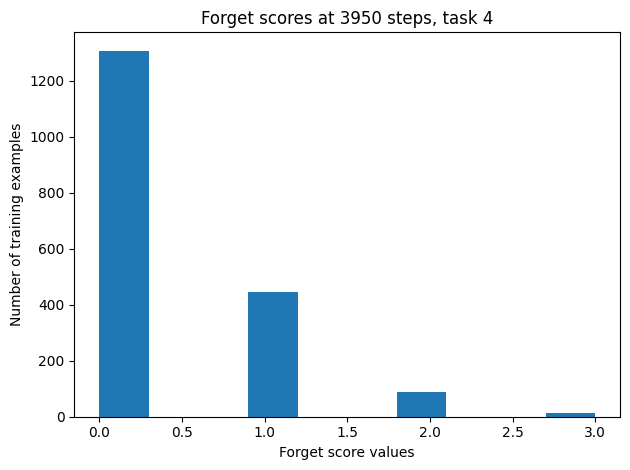

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(scores, bins=10)
plt.title(f"Forget scores at 3950 steps, task 4")
plt.xlabel(f"Forget score values")
plt.ylabel("Number of training examples")
plt.show()

In [ ]:
print(scipy.stats.spearmanr(cifar10_miscsetup_precomputed_fscore, cifar10_miscsetup_cl_fscore))

SignificanceResult(statistic=0.39105824818440316, pvalue=0.0)


In [ ]:
cifar10_studysetup_precomputed_fscore = np.load("./cifar10_studysetup_fscore_seed1.npy")
cifar10_studysetup_cl_fscore = np.load("./cifar10_studysetup_cl_fixedunforgettablesmem_global_fs_task=4_globaliter=3950.npy")

FileNotFoundError: ignored